In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import pandas as pd

In [2]:
data = loadmat('ex4data1.mat')
theta_data = loadmat('ex4weights.mat')
X = data['X'] #5000x400
y = data['y'] #5000x1
theta1 = theta_data['Theta1'] #25x401
theta2 = theta_data['Theta2'] #10x26
y[y==10]= 0 
m = y.size
plt.rcParams['figure.figsize'] = [11, 11]

/home/hai/.local/lib/python3.6/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


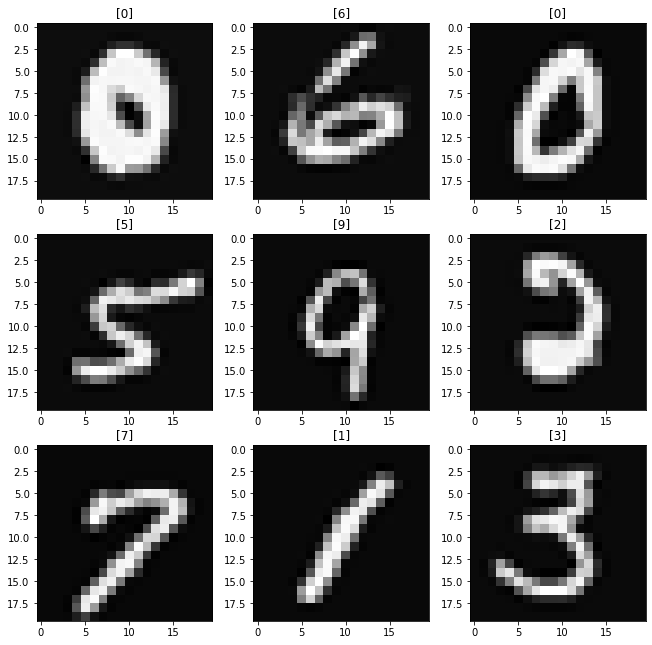

In [3]:
rand_indices = np.random.choice(m, 10, replace  = False)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(y[rand_indices[i]])
    plt.imshow(X[rand_indices[i]].reshape(20,20).T, cmap = 'gray')

In [4]:
def sigmoid(z):
    return (1/ (1 + np.exp(-z)))

In [35]:
def feed_forward(X, theta1, theta2):
    m = len(X)
    out = np.hstack((np.ones((m,1)),X))  #5000x401
    out =  out.dot(theta1.T)     #5000x25
    out = sigmoid(out)      #5000x25
    out = np.hstack((np.ones((m,1)),out)) #5000x26
    out = out.dot(theta2.T)    #5000x10
    out = sigmoid(out)              #5000x10
    return out       

In [101]:
out = feed_forward(X, theta1, theta2)
print(theta2.shape)

(10, 26)


In [103]:
#y.shape = 5000x1
def loss_and_gradient(X,y,theta1 , theta2, lamda = 0):    
    y = pd.get_dummies(y.ravel()).to_numpy()
    m = len(X)
    out1 = np.hstack((np.ones((m,1)),X))
    out1b  = out1.dot(theta1.T)
    a2 = sigmoid(out1b)
    out2= np.hstack((np.ones((m,1)),a2))
    out3b = out2.dot(theta2.T)
    a3 = sigmoid(out2)
    J = (1/m)*((y*log(a2)) -(1-y)*log(1- a2)).sum() + (lamda/2*m)*((theta1[:,1:]**2).sum()+ (theta2[:,1:]**2).sum())
    
    #Backpropagation 
    delta3 = a3 - y #5000x10 
    delta2 = (theta2[:,1:].T).dot(delta3.T)*a2*(1- a2)  #25x5000
    
    grad_2 = 1/m * delta3.T.dot(a2)
    grad_1 = 1/m * delta2.T.dot(out1)
    theta1_reg = np.c_[np.ones((theta1.shape[0],1)),theta1[:,1:]]
    theta2_reg = np.c_[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    
    theta1_grad = D1/m + (theta1_reg * lamda)/m 
    theta2_grad= D2/m + (theta2_reg * lamda)/m
    return J, grad_1, grad_2